In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-02 18:13:04.578126: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 18:13:04.608715: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 18:13:05.064963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_ind', 'Cam_branco_ind', 'Cam_rosa_ind', 'Cam_barba_ruca_ind','Cam_santana_ind']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_santana_ind']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']
  
dados = dados[['Ano','Cam_santana_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_santana_ind'] = dados.loc[i,'Cam_santana_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_santana_ind'].values
dados.head()



/tmp/ipykernel_20510/386568009.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']


,Ano,Cam_santana_ind,Soma,Prop_Cam_santana_ind
0,1982,1.0,289.0,0.003460
1,1983,4.0,501.0,0.007984
2,1984,17.0,618.0,0.027508
3,1996,1.0,210.0,0.004762
4,1998,3.0,235.5,0.012739


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [12]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=90, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_santana/pesos prop ind 1962-2009/.weights.h5', overwrite=True)

Epoch 1/90


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step - loss: 0.9991
Epoch 2/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9763
Epoch 3/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9592
Epoch 4/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9433
Epoch 5/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9274
Epoch 6/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9098
Epoch 7/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8924
Epoch 8/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8761
Epoch 9/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8617
Epoch 10/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8495
Epoch 11/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8405
Epoch 12/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8340
Epoch 13/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8295
Epoch 14/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8259
Epoch 15/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8222
Epoch 16/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms

In [6]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_santana/pesos prop ind 1962-2009/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[0.        ]
 [0.0001042 ]
 [0.00053778]
 [0.00098654]
 [0.00143532]
 [0.00188407]
 [0.00233287]
 [0.00278165]
 [0.0032304 ]
 [0.00367921]
 [0.00414176]
 [0.00467222]
 [0.00522663]
 [0.00578103]
 [0.0063354 ]
 [0.00692815]
 [0.00753707]
 [0.00814596]
 [0.00875485]
 [0.00936849]
 [0.01000714]
 [0.01064839]
 [0.01125899]
 [0.01116925]
 [0.01066833]
 [0.01013965]
 [0.00967363]
 [0.00922751]
 [0.00884118]
 [0.00850774]
 [0.00814524]
 [0.00777551]
 [0.00747482]
 [0.00721445]
 [0.00713368]
 [0.00754421]
 [0.00799917]
 [0.00830939]
 [0.00887492]
 [0.0078022 ]
 [0.00626262]
 [0.00604953]
 [0.00731112]
 [0.01019881]
 [0.01339022]
 [0.01745682]
 [0.02335525]
 [0.02996327]]


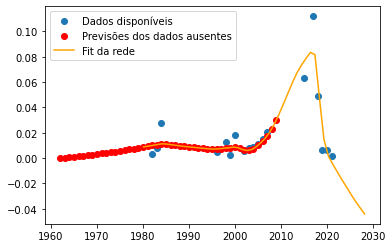

In [13]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

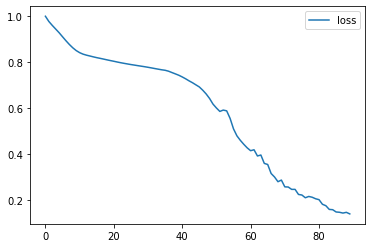

In [14]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [15]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_continua_Cam_santana_ind 1962-2009',prev_continua)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
